<a href="https://colab.research.google.com/github/uavinash15/DataScience-/blob/main/Probability_Distributions_and_Hypothesis_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.4 | BINOMIAL DISTRIBUTION**

*3.4.1 | Example of Binomial Distribution*

In [ ]:
#stats.binom.pmf(expected no.of successful trails, n, p)
from scipy import stats
print("probability: ",stats.binom.pmf(5,20,0.1))

probability:  0.031921361119954424


In [ ]:
print("probability percent",100*stats.binom.pmf(5,20,0.1),"%")

probability percent 3.1921361119954423 %


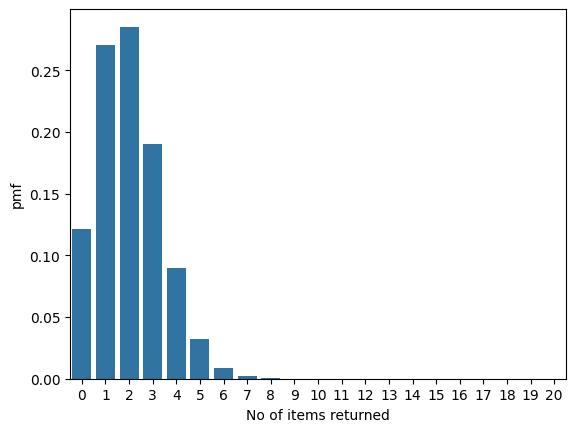

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
# range(0,21) returns all values from 0 to 20 (excluding 21)
pmf_df=pd.DataFrame({'success':range(0,21),
                     'pmf':list(stats.binom.pmf(range(0,21),20,0.1))})
# Creating a bar plot with number of success as x and pmf as y
sn.barplot(x=pmf_df.success,y=pmf_df.pmf)
plt.xlabel("No of items returned")
plt.ylabel("pmf")
plt.show()

In [ ]:
from scipy import stats
print(stats.binom.cdf(5,20,0.1))

0.988746865835491


In [ ]:
print("probability percent: ",100*stats.binom.cdf(5,20,0.1),"%")

probability percent:  98.87468658354909 %


In [ ]:
#probability more than 5 people return the product
from scipy import stats
print(1-stats.binom.cdf(5,20,0.1))

0.011253134164509015


In [ ]:
print("percentage of more than 5 people returning: ",(100)*(1-stats.binom.cdf(5,20,0.1)),"%")

percentage of more than 5 people returning:  1.1253134164509015 %


In [ ]:
#to find average(mean) and varinace:
from scipy import stats
mean, var=stats.binom.stats(20,0.1)
print("Average(mean):",mean,"variance:",var)

Average(mean): 2.0 variance: 1.8


In [ ]:
#probability calculation for normal distribution
'''
from scipy import stats
stats.norm.cdf(x,mean,std)
'''

'\nfrom scipy import stats\nstats.norm.cdf(x,mean,std)\n'

In [ ]:
from scipy import stats
x=stats.norm.cdf(70,60,10)
print("probability of x<70 : ",x)
print("probability of x<70 : ",x*100,"%")


probability of x<70 :  0.8413447460685429
probability of x<70 :  84.1344746068543 %


In [ ]:
from scipy import stats
x=stats.norm.cdf(680,711,29)
print("probability <=680: ",x)
print("probabibiltiy <=680: ",x*100,"%")

probability <=680:  0.14254260383881612
probabibiltiy <=680:  14.254260383881611 %


In [ ]:
from scipy import stats
x=stats.norm.cdf(740,711,29)
y=stats.norm.cdf(697,711,29)
print("probability: ",x-y)
print("probability percentage: ",(x-y)*100,"%")


probability:  0.5267111786415019
probability percentage:  52.67111786415018 %


# **3.7  |  NORMAL DISTRIBUTION**

In [ ]:
import pandas as pd
import numpy as np
import warnings


In [ ]:
beml_df=pd.read_csv('BEML.csv')
glaxo_df=pd.read_csv('GLAXO.csv')

In [ ]:
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [ ]:
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [ ]:
beml_df=beml_df[['Date','Close']]
glaxo_df=glaxo_df[['Date','Close']]

In [ ]:
glaxo_df=glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df=beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [ ]:
glaxo_df.head(5)

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


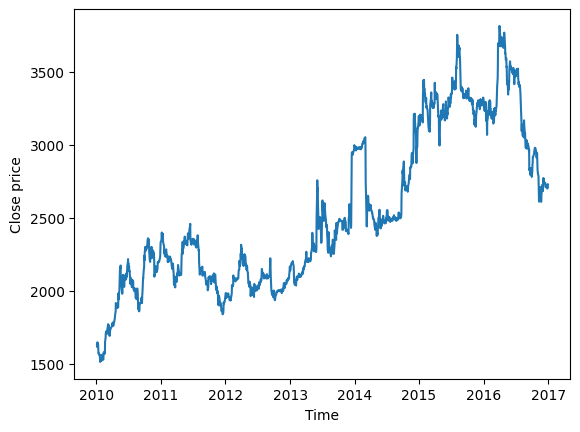

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close price')
plt.show()

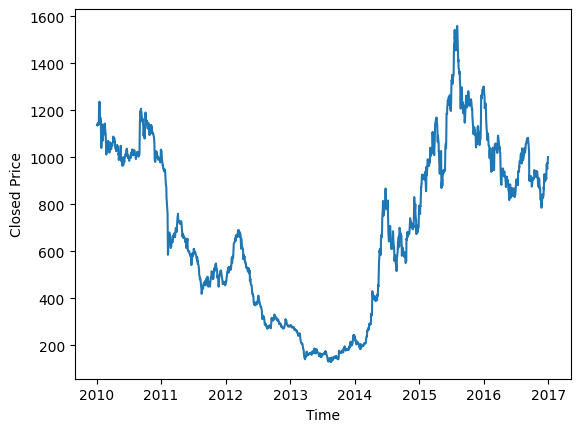

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Closed Price')
plt.show()

In [ ]:
glaxo_df['gain']=glaxo_df.Close.pct_change(periods=1)
beml_df['gain']=beml_df.Close.pct_change(periods=1)

In [ ]:
glaxo_df.head(5)

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


In [ ]:
beml_df.head(5)

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087


In [ ]:
glaxo_df=glaxo_df.dropna()
beml_df=beml_df.dropna()

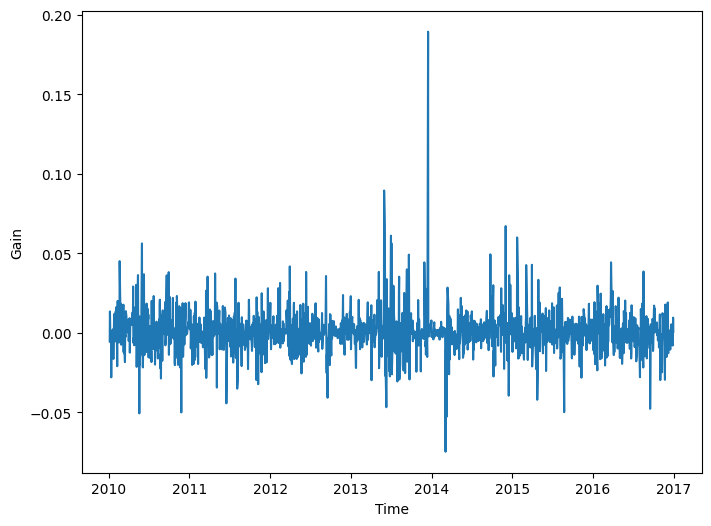

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(glaxo_df.index,glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('Gain')
plt.show()

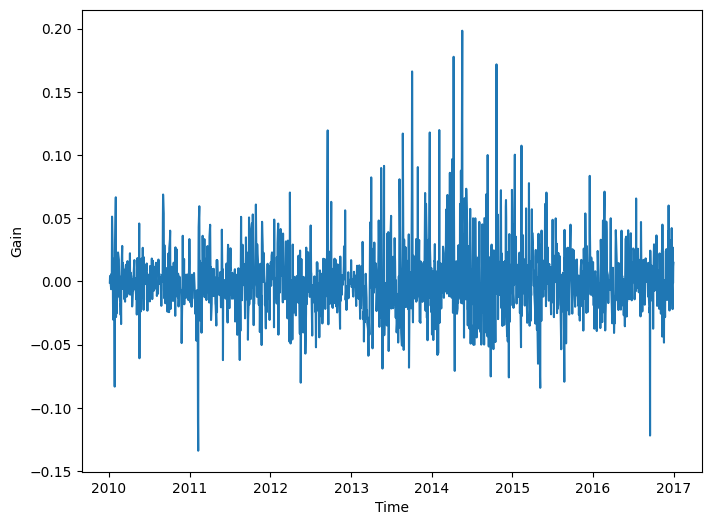

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(beml_df.index,beml_df.gain)
plt.xlabel('Time')
plt.ylabel('Gain')
plt.show()

/tmp/ipython-input-1901600646.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(glaxo_df.gain,label='GLAXO')
/tmp/ipython-input-1901600646.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(beml_df.gain,label='BEML')


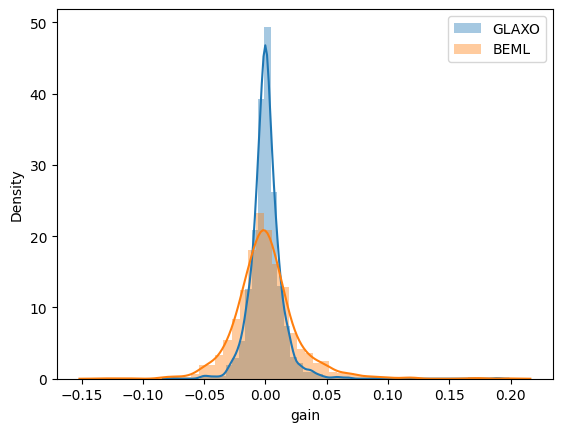

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import warnings
sn.distplot(glaxo_df.gain,label='GLAXO')
sn.distplot(beml_df.gain,label='BEML')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()
plt.show()


# **Mean and Variance**

In [ ]:
print("Daily gain of GLAXO: ")
print("---------------------")
print("Mean: ",round(glaxo_df.gain.mean(),4))
print("Standard Deviation: ",round(glaxo_df.gain.std(),4))

Daily gain of GLAXO: 
---------------------
Mean:  0.0004
Standard Deviation:  0.0134


In [ ]:
print("Daily gain of BEML")
print("------------------")
print("Mean: ",round(beml_df.gain.mean(),4))
print("Standard Deviation: ",round(beml_df.gain.std(),4))

Daily gain of BEML
------------------
Mean:  0.0003
Standard Deviation:  0.0264


In [ ]:
glaxo_df.gain.describe()

,gain
count,1738.000000
mean,0.000386
std,0.013361
min,-0.074719
25%,-0.005850
50%,-0.000021
75%,0.005826
max,0.189196


In [ ]:
beml_df.gain.describe()

,gain
count,1738.000000
mean,0.000271
std,0.026431
min,-0.133940
25%,-0.013736
50%,-0.001541
75%,0.011985
max,0.198329


In [ ]:
print("Risk of GLAXO: ", (100)*(round(glaxo_df.gain.std(),4)),"%","  Risk of BEML: ",(100)*(round(beml_df.gain.std(),4)),"%")

Risk of GLAXO:  1.34 %   Risk of BEML:  2.64 %


# **Confidence Interval**

In [ ]:
#stats.norm for finding  normal distribution
#stats.norm.interval() for finding confidence Intervals for NOrmal Distribution
#stats.norm.interval(alpha,loc,scale); alpha= interval, 0.9 for 90% confident Interval; loc=mean(in the Normal Distribution), scale=standard deviation(for normal distribution)


In [ ]:
from scipy import stats
glaxo_df_CI=stats.norm.interval(0.95,loc=glaxo_df.gain.mean(),scale=glaxo_df.gain.std())
print("Gain at 95% Confidence Interval is",np.round(glaxo_df_CI,4))
print("gain % at 95% Confidece Interval is",100*np.round(glaxo_df_CI,4),"%")

Gain at 95% Confidence Interval is [-0.0258  0.0266]
gain % at 95% Confidece Interval is [-2.58  2.66] %


In [ ]:
from scipy import stats
beml_df_CI=stats.norm.interval(0.95,loc=beml_df.gain.mean(),scale=beml_df.gain.std())
print("gain at 95 % Confidence Interval is : ",np.round(beml_df_CI,4))
print("gain % at 95% Confidence Interval is: ",100*np.round(beml_df_CI,4))

gain at 95 % Confidence Interval is :  [-0.0515  0.0521]
gain % at 95% Confidence Interval is:  [-5.15  5.21]


# **Cumulative Probability Distribution**

In [ ]:
# stats.norm.cdf() -> gives the cumulative distribution for normal distribution i.e


In [ ]:
print("probability of making 2% loss or higher in GLAXO: ")
print(np.round(stats.norm.cdf(-0.02,loc=glaxo_df.gain.mean(),scale=glaxo_df.gain.std()),4))

probability of making 2% loss or higher in GLAXO: 
0.0635


In [ ]:
print("probability % of making 2% loss or higher in GLAXO: ",100*np.round(stats.norm.cdf(-0.02,loc=glaxo_df.gain.mean(),scale=glaxo_df.gain.std()),4),"%")

probability % of making 2% loss or higher in GLAXO:  6.35 %


In [ ]:
print("probability of making 2% loss or higher in BEML: ")
print(np.round(stats.norm.cdf(-0.02,loc=beml_df.gain.mean(),scale=beml_df.gain.std()),4))

probability of making 2% loss or higher in BEML: 
0.2216


In [ ]:
print("probability % of making 2% loss or higher in BEML: ",100*np.round(stats.norm.cdf(-0.02,loc=beml_df.gain.mean(),scale=beml_df.gain.std()),4),"%")

probability % of making 2% loss or higher in BEML:  22.16 %


In [ ]:
print("probability of making 2% gain or higher in GLAXO: ")
print(np.round(1-stats.norm.cdf(0.02,loc=glaxo_df.gain.mean(),scale=glaxo_df.gain.std()),4))

probability of making 2% gain or higher in GLAXO: 
0.071


In [ ]:
print("probability percent of making 2% gain or higher in GLAXO: ",100*np.round(1-stats.norm.cdf(0.02,loc=glaxo_df.gain.mean(),scale=glaxo_df.gain.std()),4),"%")

probability percent of making 2% gain or higher in GLAXO:  7.1 %


In [ ]:
print("probability of making 2% gain or higher in BEML: ")
print(np.round(1-stats.norm.cdf(0.02,loc=beml_df.gain.mean(),scale=beml_df.gain.std()),4))

probability of making 2% gain or higher in BEML: 
0.2277


In [ ]:
print("probability percentage of making 2% gain or higher in BEML: ",np.round(100*np.round(1-stats.norm.cdf(0.02,loc=beml_df.gain.mean(),scale=beml_df.gain.std()),4),4))
print()

probability percentage of making 2% gain or higher in BEML:  22.77



In [ ]:
1-0.025


0.975

# **Z-VALUES, CRIRTICAL Z VALUES**

In [ ]:
#for 99% CL,0.99 probability,
#both tails combined value: (alpha=1-0.99=0.01),
#each tail value: (alpha/2)=0.005
#0.99 probability+ 0.005 probability at one tail= 0.995 which is equals to 1-alpha/2


from scipy import stats
print(stats.norm.ppf(1-0.005))  #norm=normal distribtuion,ppf=percent point function, cdf=cumulative distibution frequency, ppf is inverse of cdf


2.5758293035489004


In [ ]:
# 95% CL
# 0.95 probability
# alpha=1-probability=1-0.95=0.05
# alpha/2=0.05/2= 0.025
# each tail value: 0.025
# probability+alpha/2=0.95+0.025 = 0.975
# 1-alpha/2=1-0.025


from scipy import stats
print(stats.norm.ppf(1-0.025))

1.959963984540054


In [ ]:
# CL=90%
# CL_P=0.90
# alpha= 1-0.90 = 0.10
# alpha/2= 0.10/2= 0.05
# CL_P+alpha/2= 0.90+0.05 = 0.95
# 1-alpha/2= 1-0.05= 0.95
# CL_P+alpha/2=1-alpha/2

from scipy import stats
print(stats.norm.ppf(1-0.05))

1.6448536269514722


# **Estimating Population Means**

In [ ]:
# for 99% CI
from scipy import stats
print("critical t value: ",stats.t.ppf(1-0.005,29)) #t.ppf(1-alpha/2,df=n-1)

critical t value:  2.756385903670335


In [ ]:
# for 95% CI
from scipy import stats
print("critical t value: ",stats.t.ppf(1-0.025,29))


critical t value:  2.045229642132703


In [ ]:
# for 90% CI
from scipy import stats
print("critical t value: ",stats.t.ppf(1-0.95,29))

critical t value:  -1.6991270265334972


In [ ]:
'''
Credit card: Mean Balance
n=140, population_std=2500, mean=1990, sample std=population std/n=211.29
'''

'\nCredit card: Mean Balance\nn=140, population_std=2500, mean=1990, sample std=population std/n=211.29\n'

In [ ]:
# 95% CI for the mean card balance:

from scipy import stats
print(stats.norm.ppf(0.975))

1.959963984540054


In [ ]:
# 90% CI for the mean card balance

from scipy import stats
print(stats.norm.ppf(0.95))

1.6448536269514722


# **Student's T Distribution**

*Finding the P-Value of a T-Value*

In [ ]:
# tval=2.1, df=29
from scipy import stats
print(stats.t.cdf(2.1,29))

0.9777290209818548


In [ ]:
#find the t-value separating the top 25% from the bottom 75% with 29 degrees of freedom:

from scipy import stats
print(stats.t.ppf(1-0.25,29))

0.6830438608216131


In [ ]:
from scipy import stats
print(stats.t.ppf(0.975,139))

1.977177724476122


# **Hypothesis Test**

# **Z Test**

In [ ]:
import pandas as pd


In [ ]:
passport_df=pd.read_csv("passport.csv")

In [ ]:
passport_df.head(5)

,processing_time
0,16.0
1,16.0
2,30.0
3,37.0
4,25.0


In [ ]:
print(list(passport_df.processing_time))

[16.0, 16.0, 30.0, 37.0, 25.0, 22.0, 19.0, 35.0, 27.0, 32.0, 34.0, 28.0, 24.0, 35.0, 24.0, 21.0, 32.0, 29.0, 24.0, 35.0, 28.0, 29.0, 18.0, 31.0, 28.0, 33.0, 32.0, 24.0, 25.0, 22.0, 21.0, 27.0, 41.0, 23.0, 23.0, 16.0, 24.0, 38.0, 26.0, 28.0]


In [ ]:
# H0: mean>=30
# H1: mean<30

In [ ]:
import math
from scipy import stats
import numpy as np
def z_test(pop_mean,pop_std,sample):
  z_score=(sample.mean()-pop_mean)/(pop_std/math.sqrt(len(sample)))
  return z_score,stats.norm.cdf(z_score)

In [ ]:
z_test(30,12.5,passport_df.processing_time)

(np.float64(-1.4925950555994747), np.float64(0.06777160919961511))

# **One -Sample t-Test**

In [ ]:
import pandas as pd
bollywood_movies_df=pd.read_csv("bollywoodmovies.csv")

In [ ]:
bollywood_movies_df.head(5)

,production_cost
0,601
1,627
2,330
3,364
4,562


In [ ]:
print(list(bollywood_movies_df.production_cost))

[601, 627, 330, 364, 562, 353, 583, 254, 528, 470, 125, 60, 101, 110, 60, 252, 281, 227, 484, 402, 408, 601, 593, 729, 402, 530, 708, 599, 439, 762, 292, 636, 444, 286, 636, 667, 252, 335, 457, 632]


In [ ]:
# H0: mean=500
# H1: mean!=500


In [ ]:
#scipy.stats.ttest_lsamp(a:array_like,popmean:float)

In [ ]:
from scipy import stats
stats.ttest_1samp(bollywood_movies_df.production_cost,500)

TtestResult(statistic=np.float64(-2.2845532872667547), pvalue=np.float64(0.027862556406761777), df=np.int64(39))

In [ ]:
# pvalue=0.025<0.05: reject H0

# **Two-Sample t-Test**

In [ ]:
import pandas as pd
healthdrink_yes_df=pd.read_excel('healthdrink.xlsx','healthdrink_yes')


In [ ]:
healthdrink_yes_df.head(5)

,height_increase
0,8.6
1,5.8
2,10.2
3,8.5
4,6.8


In [ ]:
healthdrink_yes_df.columns

Index(['height_increase'], dtype='object')

In [ ]:
healthdrink_no_df=pd.read_excel('healthdrink.xlsx','healthdrink_no')
healthdrink_no_df.head(5)

,height_increase
0,5.3
1,9.0
2,5.7
3,5.5
4,5.4


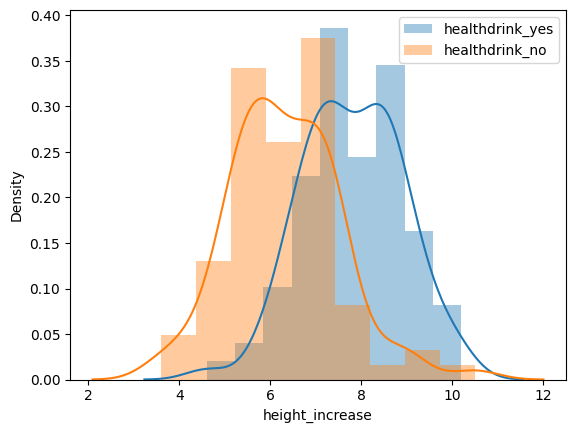

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
sn.distplot(healthdrink_yes_df['height_increase'],label='healthdrink_yes')
sn.distplot(healthdrink_no_df['height_increase'],label='healthdrink_no')
warnings.filterwarnings('ignore')
plt.legend()
plt.show()

In [ ]:
stats.ttest_ind(healthdrink_yes_df['height_increase'],healthdrink_no_df['height_increase'])

TtestResult(statistic=np.float64(8.131675069083359), pvalue=np.float64(1.197698592263946e-13), df=np.float64(157.0))

# **Paired Sample t-Test**

In [ ]:
import pandas as pd
breakups_df=pd.read_csv('breakups.csv')
breakups_df.head(5)

,Before_Breakup,After_Breakup
0,470,408
1,354,439
2,496,321
3,351,437
4,349,335


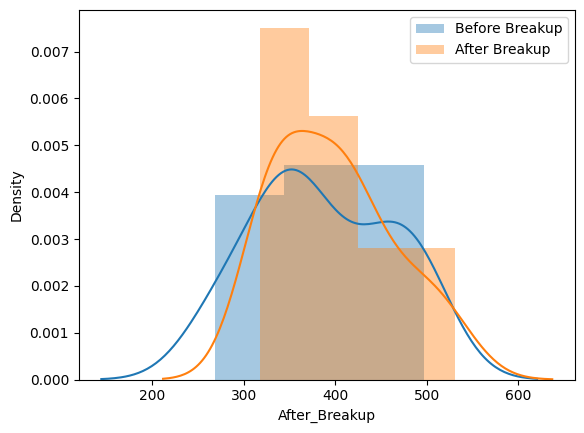

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.distplot(breakups_df['Before_Breakup'],label='Before Breakup')
sn.distplot(breakups_df['After_Breakup'],label='After Breakup')
plt.legend()
plt.show()



In [ ]:
stats.ttest_rel(breakups_df['Before_Breakup'],breakups_df['After_Breakup'])

TtestResult(statistic=np.float64(-0.5375404241815106), pvalue=np.float64(0.5971346738292477), df=np.int64(19))

# **Anova and Chi-square Test**

# **Anova**

In [ ]:
import pandas as pd

In [ ]:
onestop_df=pd.read_csv('onestop.csv')

In [ ]:
onestop_df.head(5)

,discount_0,discount_10,discount_20
0,39,34,42
1,32,41,43
2,25,45,44
3,25,39,46
4,37,38,41


In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import warnings

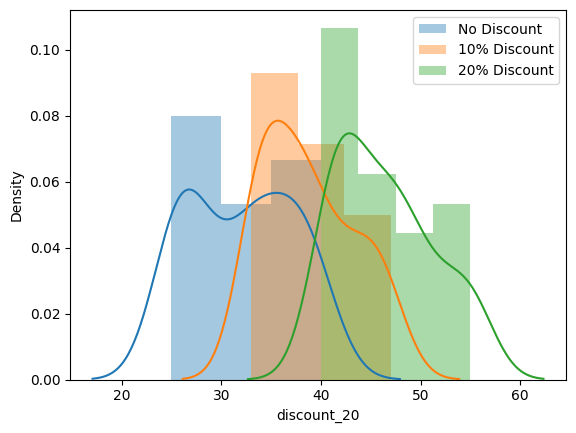

In [ ]:

sn.distplot(onestop_df['discount_0'],label='No Discount')
sn.distplot(onestop_df['discount_10'],label='10% Discount')
sn.distplot(onestop_df['discount_20'],label='20% Discount')
plt.legend()
warnings.filterwarnings('ignore')
plt.show()


In [ ]:
import scipy
from scipy import stats

In [ ]:
# to find fstat val, p val
stats.f_oneway(onestop_df['discount_0'],onestop_df['discount_10'],onestop_df['discount_20'])

F_onewayResult(statistic=np.float64(65.86986401283694), pvalue=np.float64(3.821500669725641e-18))

In [ ]:
# pval=0.00 <0.05: accept H1

# **Chi Square**

In [ ]:
## Observed frequencies
f_obs = [190, 185, 90, 35]
## Expected frequencies from the percentages expected
f_exp = [500*0.35, 500*0.4, 500*.2, 500*0.05]
print(f_exp)

[175.0, 200.0, 100.0, 25.0]


In [ ]:
# to find chi statistc val, p val
stats.chisquare(f_obs, f_exp)

Power_divergenceResult(statistic=np.float64(7.410714285714286), pvalue=np.float64(0.05989751420084909))

In [ ]:
# pval=0.06>0.05 accept H0